<a href="https://www.kaggle.com/code/georgelukaanya/adamnea-monthly-insights?scriptVersionId=205929044" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [2]:
# Load the data and set the 'created_at' column as the index

carbondioxide = pd.read_csv('/kaggle/input/monthlyinsights/hive_carbondioxide_APR_OCT_hive1.csv', index_col='created_at')

humidity = pd.read_csv('/kaggle/input/monthlyinsights/hive_humidity_APR_OCT_hive1.csv', index_col='created_at')

temperatures = pd.read_csv('/kaggle/input/monthlyinsights/hive_temperatures_APR_OCT_hive1.csv', index_col='created_at')

weights = pd.read_csv('/kaggle/input/monthlyinsights/hive_weights_APR_OCT_hive1.csv', index_col='created_at')



# Convert the index to datetime

carbondioxide.index = pd.to_datetime(carbondioxide.index)

humidity.index = pd.to_datetime(humidity.index)

temperatures.index = pd.to_datetime(temperatures.index)

weights.index = pd.to_datetime(weights.index)





# Check for and remove duplicates in the index

humidity = humidity[~humidity.index.duplicated(keep='first')]

carbondioxide = carbondioxide[~carbondioxide.index.duplicated(keep='first')]

temperatures = temperatures[~temperatures.index.duplicated(keep='first')]

weights = weights[~weights.index.duplicated(keep='first')]

In [3]:
#Cleaning the humidity data

# Replace '*2*' with a comma in the 'record' column

humidity['record'] = humidity['record'].str.replace('*2*', ',', regex=False)



# Split the 'record' column and assign to new columns

humidity[['Interior (%)', 'Exterior (%)']] = humidity['record'].str.split(',', expand=True)



# Drop the 'record' column as it's no longer needed

humidity = humidity.drop(columns=['record'])



# Convert new columns to numeric types

humidity['Interior (%)'] = pd.to_numeric(humidity['Interior (%)'], errors='coerce')

humidity['Exterior (%)'] = pd.to_numeric(humidity['Exterior (%)'], errors='coerce')



# Replace values of 2 with NaN (without inplace to avoid warnings)

humidity['Interior (%)'] = humidity['Interior (%)'].replace(2, np.nan)

humidity['Exterior (%)'] = humidity['Exterior (%)'].replace(2, np.nan)



# Display the resulting DataFrame

humidity.head()


,Interior (%),Exterior (%)
created_at,,
2024-04-02 17:52:03,NaN,NaN
2024-04-02 17:54:00,NaN,NaN
2024-04-02 18:06:05,NaN,NaN
2024-04-02 18:54:12,NaN,NaN
2024-04-03 20:08:06,94.2,84.3


In [4]:
#Cleanind the CO2 data

#replacing 2 with NaN

carbondioxide['record'] = carbondioxide.record.replace(2, np.nan)

carbondioxide.head()

,record
created_at,
2024-04-02 17:52:03,NaN
2024-04-02 17:54:00,661.0
2024-04-02 18:06:05,530.0
2024-04-02 18:54:12,405.0
2024-04-03 20:08:06,7330.0


In [5]:
#Cleaning the weights data, replacing the 2 with NaN

weights.record = weights.record.replace(2, np.nan)

weights.head()

,record
created_at,
2024-04-02 17:52:03,NaN
2024-04-02 17:54:00,103.0
2024-04-02 18:06:05,96.0
2024-04-02 18:54:12,NaN
2024-04-03 20:08:06,15.0


In [6]:
#Cleaning the temperature data

# Replace '*2*' with a comma in the 'record' column

temperatures['record'] = temperatures['record'].str.replace('*2*', ',', regex=False)



# Split the 'record' column and assign to new columns

temperatures[['Interior (°C)', 'Exterior (°C)']] = temperatures['record'].str.split(',', expand=True)



# Drop the 'record' column as it's no longer needed

temperatures = temperatures.drop(columns=['record'])



# Convert new columns to numeric types

temperatures['Interior (°C)'] = pd.to_numeric(temperatures['Interior (°C)'], errors='coerce')

temperatures['Exterior (°C)'] = pd.to_numeric(temperatures['Exterior (°C)'], errors='coerce')



# Replace values of 2 with NaN (without inplace to avoid warnings)

temperatures['Interior (°C)'] = temperatures['Interior (°C)'].replace(2, np.nan)

temperatures['Exterior (°C)'] = temperatures['Exterior (°C)'].replace(2, np.nan)



# Display the resulting DataFrame

temperatures.head()


,Interior (°C),Exterior (°C)
created_at,,
2024-04-02 17:52:03,NaN,NaN
2024-04-02 17:54:00,NaN,NaN
2024-04-02 18:06:05,NaN,NaN
2024-04-02 18:54:12,NaN,NaN
2024-04-03 20:08:06,27.3,23.9


In [7]:
# Remove NaN values from each DataFrame

carbondioxide.dropna(inplace=True)

humidity.dropna(inplace=True)

temperatures.dropna(inplace=True)

weights.dropna(inplace=True)

In [8]:
carbondioxide.describe()

,record
count,1126.000000
mean,2409.031972
std,3813.277742
min,0.000000
25%,432.250000
50%,723.000000
75%,2751.250000
max,20676.000000


In [9]:
weights.describe()

,record
count,682.000000
mean,21.994707
std,12.654259
min,0.000000
25%,15.000000
50%,22.185000
75%,24.537500
max,211.430000


In [10]:
temperatures.describe()

,Interior (°C),Exterior (°C)
count,915.000000,915.000000
mean,27.452131,25.393224
std,3.384054,2.774800
min,17.100000,17.700000
25%,25.700000,23.050000
50%,27.200000,26.100000
75%,28.700000,27.700000
max,35.500000,31.700000


In [11]:
humidity.describe()

,Interior (%),Exterior (%)
count,915.000000,915.000000
mean,74.636284,74.052568
std,10.004887,11.399928
min,49.100000,48.800000
25%,66.750000,65.800000
50%,74.500000,71.800000
75%,83.700000,83.600000
max,98.400000,99.900000


In [12]:
# Cell 1: Define the monthly_analysis function

def monthly_analysis(df, month, columns):

    """

    Perform exploratory data analysis for a given month on specified columns.

    

    Parameters:

    - df: DataFrame to analyze.

    - month: Integer month (1=January, 2=February, ...).

    - columns: List of columns for which to derive insights.

    

    Returns:

    - insights: Dictionary containing mean, standard deviation, IQR, skewness, and outliers count.

    """

    # Filter data for the specified month

    monthly_data = df[df.index.month == month]

    

    insights = {}  # Dictionary to store calculated insights

    

    for col in columns:

        # Calculate and store each statistical metric

        insights[col] = {

            'mean': monthly_data[col].mean(),

            'std_dev': monthly_data[col].std(),

            'iqr': monthly_data[col].quantile(0.75) - monthly_data[col].quantile(0.25),

            'skewness': monthly_data[col].skew()

        }

        

        # Outlier detection based on IQR method

        q1 = monthly_data[col].quantile(0.25)

        q3 = monthly_data[col].quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 - 1.5 * iqr

        upper_bound = q3 + 1.5 * iqr

        outliers = monthly_data[(monthly_data[col] < lower_bound) | (monthly_data[col] > upper_bound)]

        

        # Remove outliers for visualization

        monthly_data_no_outliers = monthly_data[~((monthly_data[col] < lower_bound) | (monthly_data[col] > upper_bound))]

        

        # Box plot for data with outliers removed

        plt.figure(figsize=(6, 4))

        sns.boxplot(data=monthly_data_no_outliers, y=col)

        plt.title(f'{col} Box Plot ({month} - Outliers Removed)')

        plt.ylabel(col)

        plt.show()

        

        insights[col]['outliers_removed'] = outliers.shape[0]  # Record count of outliers

    

    return insights


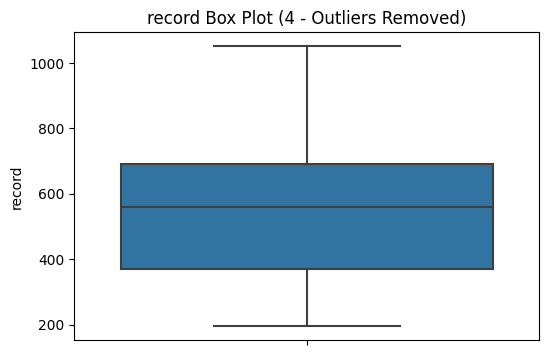

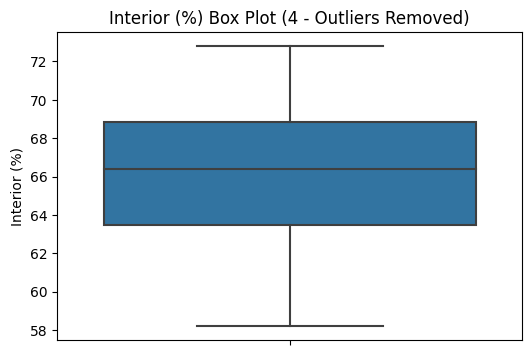

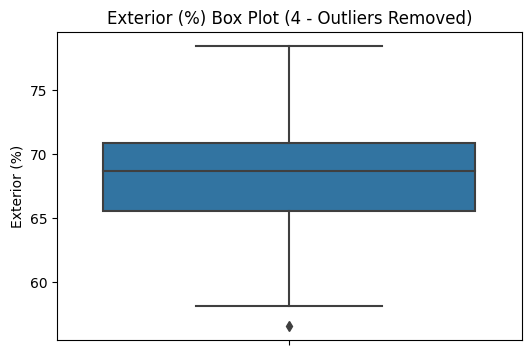

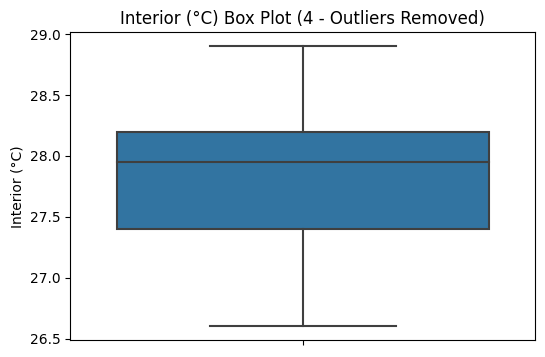

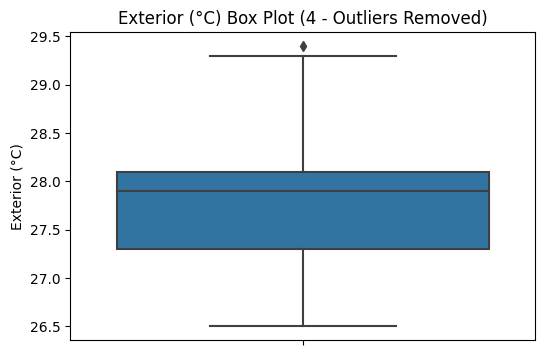

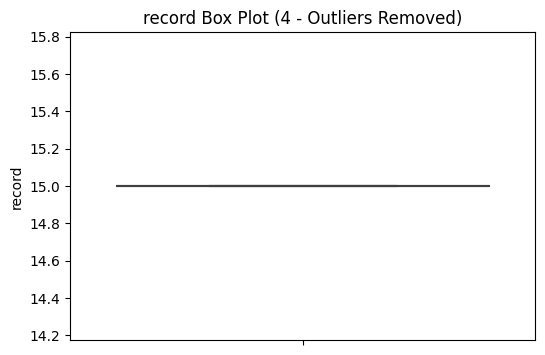

April CO2 Insights: {'record': {'mean': 680.7477477477478, 'std_dev': 873.1925172342993, 'iqr': 369.5, 'skewness': 6.46292723368845, 'outliers_removed': 4}}
April Humidity Insights: {'Interior (%)': {'mean': 68.29382716049383, 'std_dev': 7.646818712363533, 'iqr': 6.299999999999997, 'skewness': 2.366124600007422, 'outliers_removed': 6}, 'Exterior (%)': {'mean': 69.15925925925926, 'std_dev': 5.497880904898218, 'iqr': 6.400000000000006, 'skewness': 1.298761226949317, 'outliers_removed': 3}}
April Temperature Insights: {'Interior (°C)': {'mean': 27.739506172839512, 'std_dev': 0.7914668363781391, 'iqr': 0.8000000000000007, 'skewness': -1.9442813739985463, 'outliers_removed': 3}, 'Exterior (°C)': {'mean': 27.545679012345683, 'std_dev': 1.2726988432771567, 'iqr': 0.9000000000000021, 'skewness': -2.758833914618092, 'outliers_removed': 6}}
April Weight Insights: {'record': {'mean': 17.166666666666668, 'std_dev': 13.454508891959213, 'iqr': 0.0, 'skewness': 6.137516634202307, 'outliers_removed': 

In [13]:
#Implement the analysis for April (month=4) on each dataset

co2_insights_april = monthly_analysis(carbondioxide, 4, ['record'])

humidity_insights_april = monthly_analysis(humidity, 4, ['Interior (%)', 'Exterior (%)'])

temperature_insights_april = monthly_analysis(temperatures, 4, ['Interior (°C)', 'Exterior (°C)'])

weight_insights_april = monthly_analysis(weights, 4, ['record'])



# Displaying April insights

print("April CO2 Insights:", co2_insights_april)

print("April Humidity Insights:", humidity_insights_april)

print("April Temperature Insights:", temperature_insights_april)

print("April Weight Insights:", weight_insights_april)


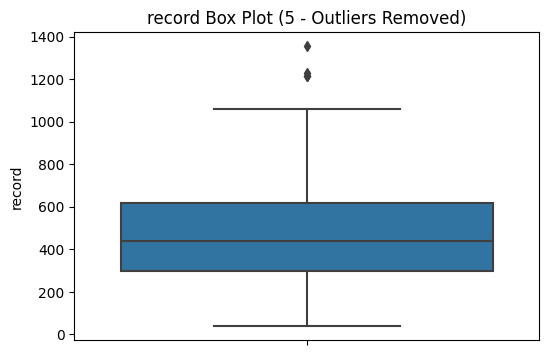

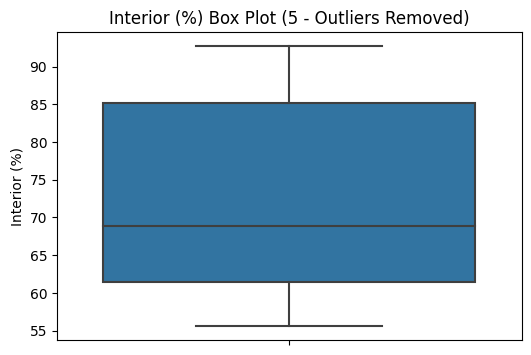

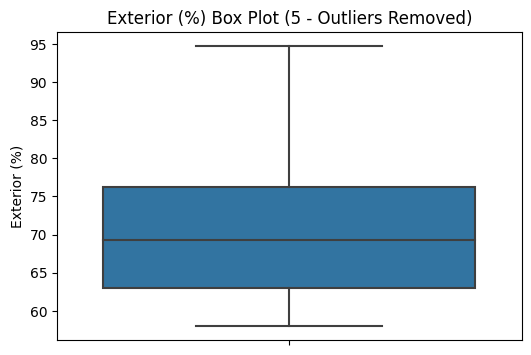

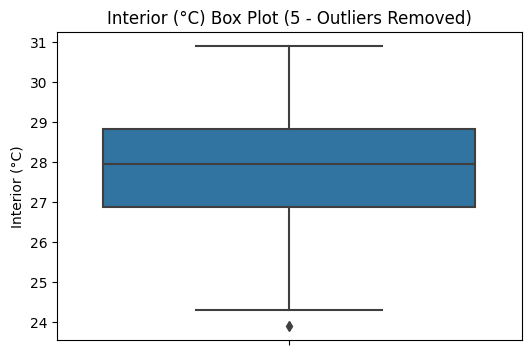

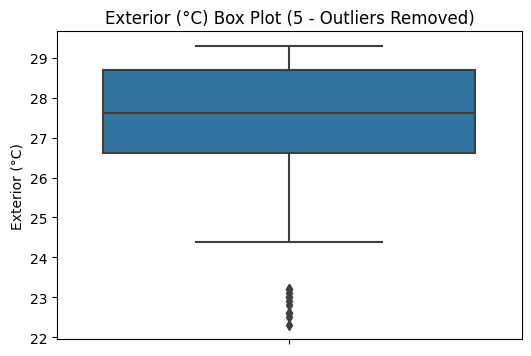

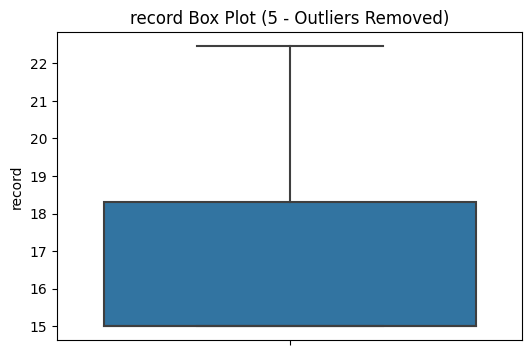

May CO2 Insights: {'record': {'mean': 1315.7372262773722, 'std_dev': 1812.7777039592202, 'iqr': 598.0, 'skewness': 1.8250474832401022, 'outliers_removed': 26}}
May Humidity Insights: {'Interior (%)': {'mean': 72.17067669172933, 'std_dev': 12.097268549420612, 'iqr': 23.599999999999994, 'skewness': 0.2935150071390839, 'outliers_removed': 0}, 'Exterior (%)': {'mean': 71.20676691729324, 'std_dev': 9.891365958683068, 'iqr': 13.400000000000006, 'skewness': 0.8111624173989479, 'outliers_removed': 2}}
May Temperature Insights: {'Interior (°C)': {'mean': 27.64360902255639, 'std_dev': 1.5020871027208775, 'iqr': 2.0, 'skewness': -0.6052785291476541, 'outliers_removed': 1}, 'Exterior (°C)': {'mean': 26.941353383458644, 'std_dev': 2.1332194981305546, 'iqr': 2.599999999999998, 'skewness': -1.064303315963558, 'outliers_removed': 5}}
May Weight Insights: {'record': {'mean': 16.237462686567167, 'std_dev': 2.218910078098584, 'iqr': 3.317499999999999, 'skewness': 1.736224078335031, 'outliers_removed': 1}

In [14]:
#Perform analysis for May (month=5) on each dataset

co2_insights_may = monthly_analysis(carbondioxide, 5, ['record'])

humidity_insights_may = monthly_analysis(humidity, 5, ['Interior (%)', 'Exterior (%)'])

temperature_insights_may = monthly_analysis(temperatures, 5, ['Interior (°C)', 'Exterior (°C)'])

weight_insights_may = monthly_analysis(weights, 5, ['record'])



# Displaying May insights

print("May CO2 Insights:", co2_insights_may)

print("May Humidity Insights:", humidity_insights_may)

print("May Temperature Insights:", temperature_insights_may)

print("May Weight Insights:", weight_insights_may)


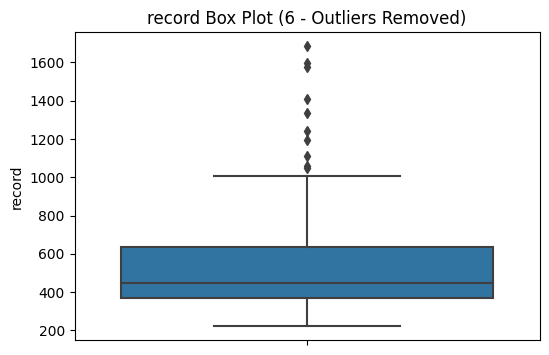

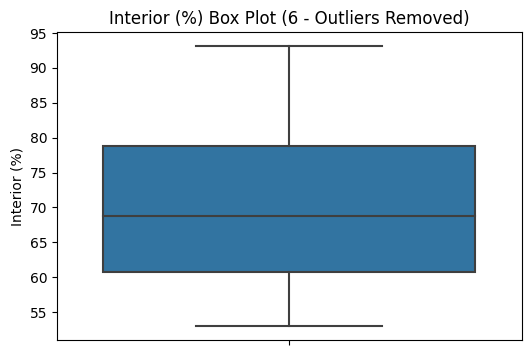

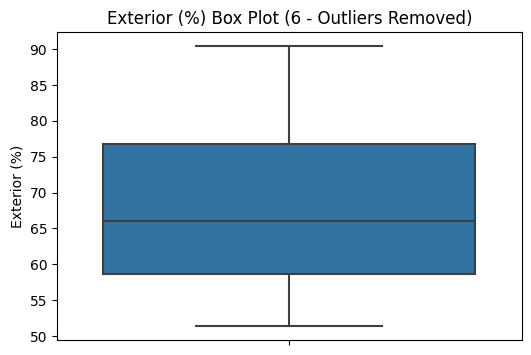

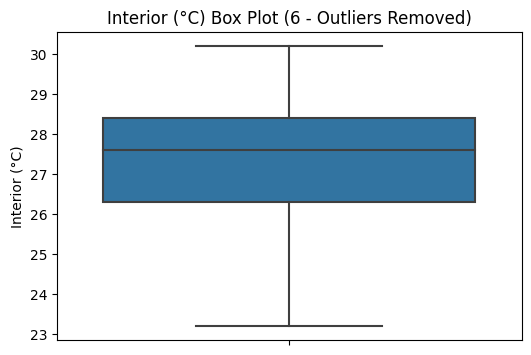

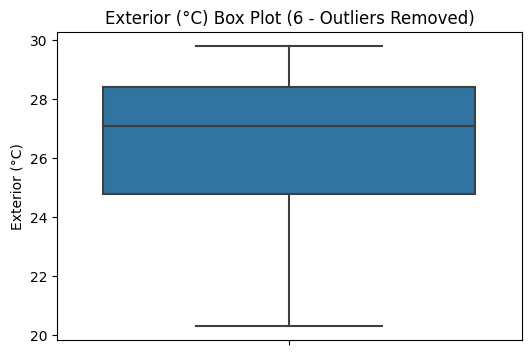

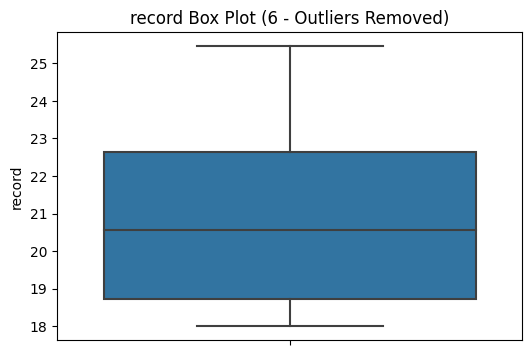

June CO2 Insights: {'record': {'mean': 1183.2389937106918, 'std_dev': 1384.5082088941126, 'iqr': 706.0, 'skewness': 1.7798058804595882, 'outliers_removed': 32}}
June Humidity Insights: {'Interior (%)': {'mean': 70.31276595744681, 'std_dev': 10.081509602547696, 'iqr': 18.099999999999994, 'skewness': 0.1800149427411161, 'outliers_removed': 0}, 'Exterior (%)': {'mean': 67.71843971631205, 'std_dev': 10.873976817790258, 'iqr': 18.1, 'skewness': 0.35426641066336495, 'outliers_removed': 0}}
June Temperature Insights: {'Interior (°C)': {'mean': 27.188652482269504, 'std_dev': 1.826866646105979, 'iqr': 2.099999999999998, 'skewness': -0.7516221550432047, 'outliers_removed': 1}, 'Exterior (°C)': {'mean': 26.374468085106383, 'std_dev': 2.5917287185891733, 'iqr': 3.599999999999998, 'skewness': -0.6692872992679241, 'outliers_removed': 0}}
June Weight Insights: {'record': {'mean': 22.696881720430106, 'std_dev': 7.770142964732349, 'iqr': 3.9899999999999984, 'skewness': 4.427824967792358, 'outliers_remo

In [15]:
#Perform analysis for April (month=4) on each dataset

co2_insights_june = monthly_analysis(carbondioxide, 6, ['record'])

humidity_insights_june = monthly_analysis(humidity, 6, ['Interior (%)', 'Exterior (%)'])

temperature_insights_june = monthly_analysis(temperatures, 6, ['Interior (°C)', 'Exterior (°C)'])

weight_insights_june = monthly_analysis(weights, 6, ['record'])



# Displaying April insights

print("June CO2 Insights:", co2_insights_june)

print("June Humidity Insights:", humidity_insights_june)

print("June Temperature Insights:", temperature_insights_june)

print("June Weight Insights:", weight_insights_june)


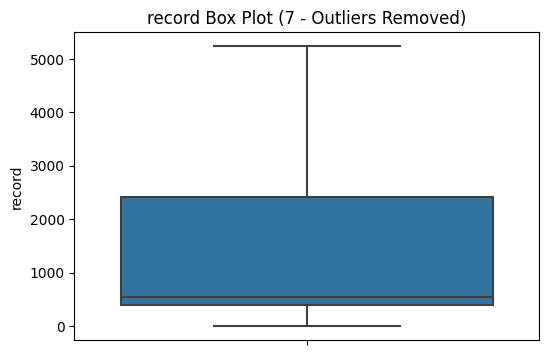

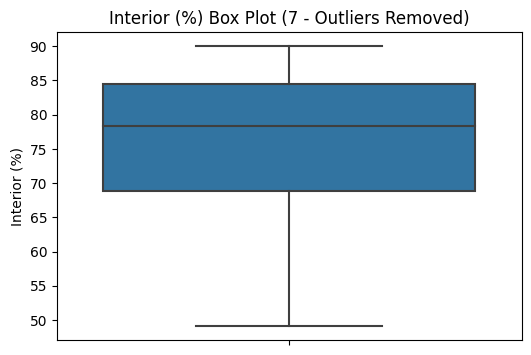

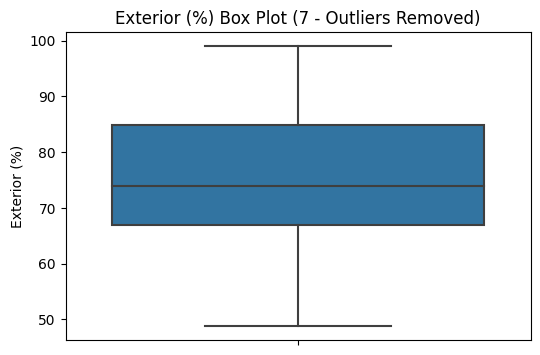

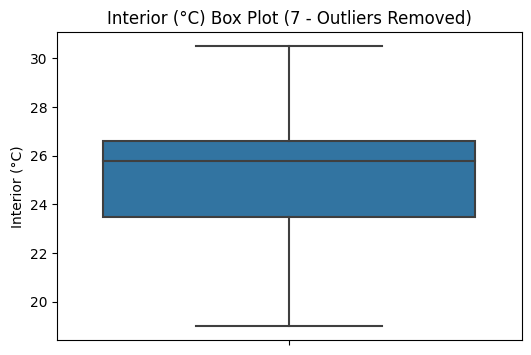

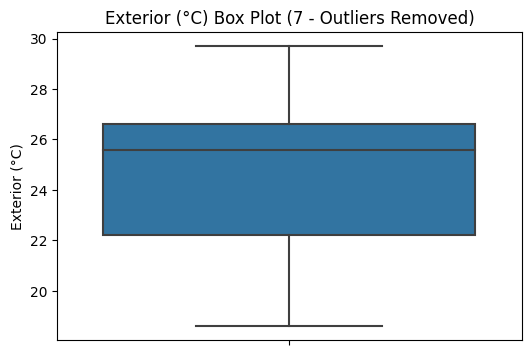

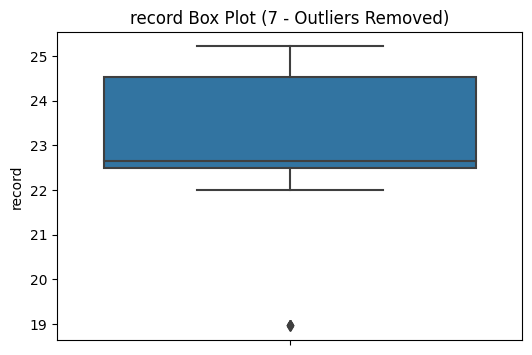

July CO2 Insights: {'record': {'mean': 1452.4836795252224, 'std_dev': 1564.7609129712473, 'iqr': 2214.0, 'skewness': 1.651416621963443, 'outliers_removed': 6}}
July Humidity Insights: {'Interior (%)': {'mean': 76.71641337386018, 'std_dev': 8.818521142780929, 'iqr': 15.5, 'skewness': -0.590413439960677, 'outliers_removed': 0}, 'Exterior (%)': {'mean': 75.52492401215805, 'std_dev': 10.839223548926302, 'iqr': 18.0, 'skewness': 0.10508472024578988, 'outliers_removed': 0}}
July Temperature Insights: {'Interior (°C)': {'mean': 25.172948328267477, 'std_dev': 2.2791668086899843, 'iqr': 3.1000000000000014, 'skewness': -0.5133005138177832, 'outliers_removed': 1}, 'Exterior (°C)': {'mean': 24.59878419452887, 'std_dev': 2.544889375187956, 'iqr': 4.400000000000002, 'skewness': -0.38060087245220586, 'outliers_removed': 0}}
July Weight Insights: {'record': {'mean': 21.517478260869566, 'std_dev': 4.96025977335623, 'iqr': 2.2375000000000007, 'skewness': -3.2816089505417954, 'outliers_removed': 42}}


In [16]:
#Perform analysis for June (month=6) on each dataset

co2_insights_july = monthly_analysis(carbondioxide, 7, ['record'])

humidity_insights_july = monthly_analysis(humidity, 7, ['Interior (%)', 'Exterior (%)'])

temperature_insights_july = monthly_analysis(temperatures, 7, ['Interior (°C)', 'Exterior (°C)'])

weight_insights_july = monthly_analysis(weights, 7, ['record'])



# Displaying June insights

print("July CO2 Insights:", co2_insights_july)

print("July Humidity Insights:", humidity_insights_july)

print("July Temperature Insights:", temperature_insights_july)

print("July Weight Insights:", weight_insights_july)


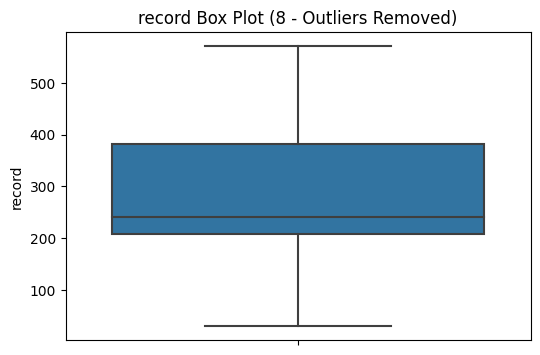

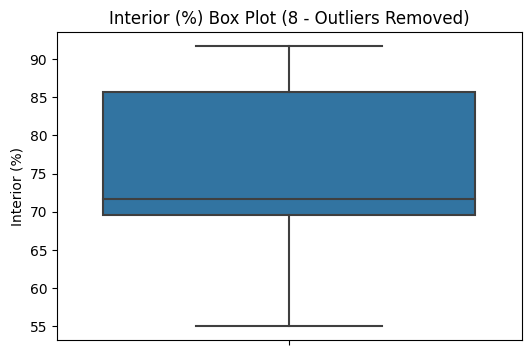

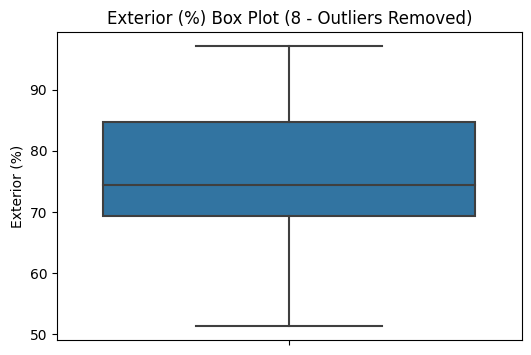

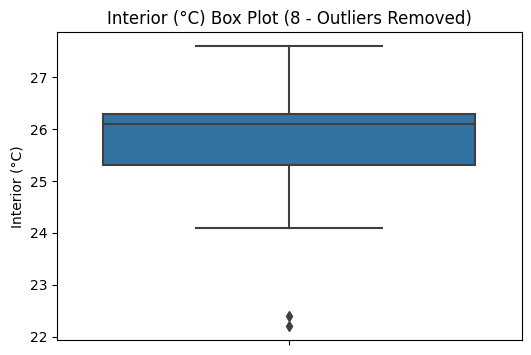

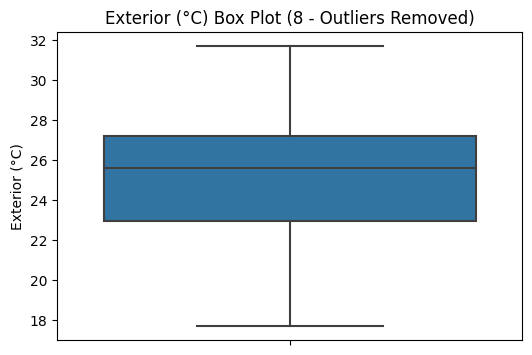

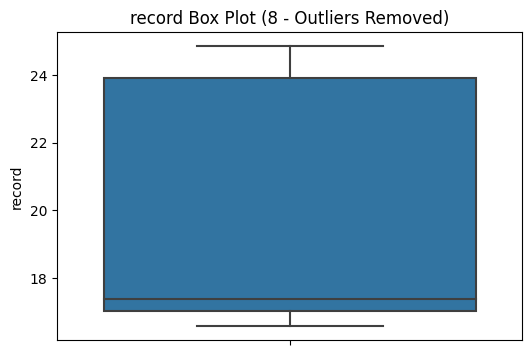

August CO2 Insights: {'record': {'mean': 300.9268292682927, 'std_dev': 147.66607434409272, 'iqr': 193.0, 'skewness': 0.9344424412812716, 'outliers_removed': 1}}
August Humidity Insights: {'Interior (%)': {'mean': 75.9975, 'std_dev': 10.633919785290841, 'iqr': 16.05000000000001, 'skewness': -0.2730619699622965, 'outliers_removed': 0}, 'Exterior (%)': {'mean': 76.685, 'std_dev': 11.117035898992462, 'iqr': 15.275000000000006, 'skewness': 0.17379660084824264, 'outliers_removed': 0}}
August Temperature Insights: {'Interior (°C)': {'mean': 24.5875, 'std_dev': 2.7665759175725335, 'iqr': 2.0500000000000007, 'skewness': -1.3668962888861584, 'outliers_removed': 7}, 'Exterior (°C)': {'mean': 24.95, 'std_dev': 3.2601714600183147, 'iqr': 4.225000000000001, 'skewness': -0.4657394080426392, 'outliers_removed': 0}}
August Weight Insights: {'record': {'mean': 20.28461538461539, 'std_dev': 3.5950227626494398, 'iqr': 6.899999999999999, 'skewness': 0.1756267776909695, 'outliers_removed': 0}}


In [17]:
#Perform analysis for August (month=8) on each dataset

co2_insights_august = monthly_analysis(carbondioxide, 8, ['record'])

humidity_insights_august = monthly_analysis(humidity, 8, ['Interior (%)', 'Exterior (%)'])

temperature_insights_august = monthly_analysis(temperatures, 8, ['Interior (°C)', 'Exterior (°C)'])

weight_insights_august = monthly_analysis(weights, 8, ['record'])



# Displaying April insights

print("August CO2 Insights:", co2_insights_august)

print("August Humidity Insights:", humidity_insights_august)

print("August Temperature Insights:", temperature_insights_august)

print("August Weight Insights:", weight_insights_august)


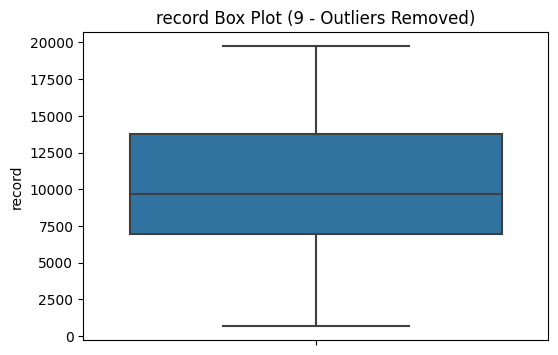

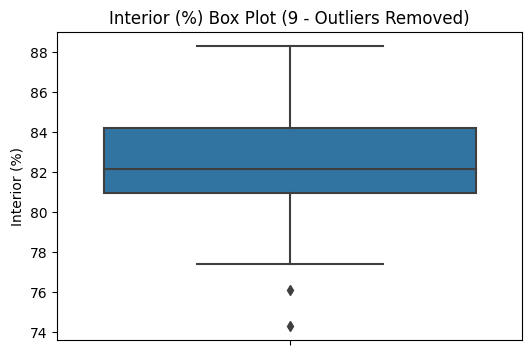

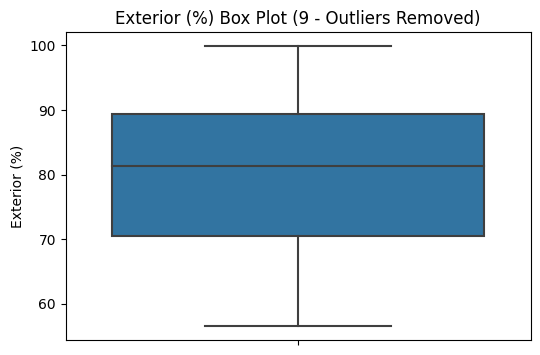

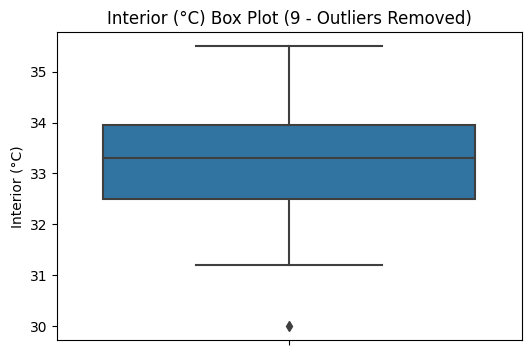

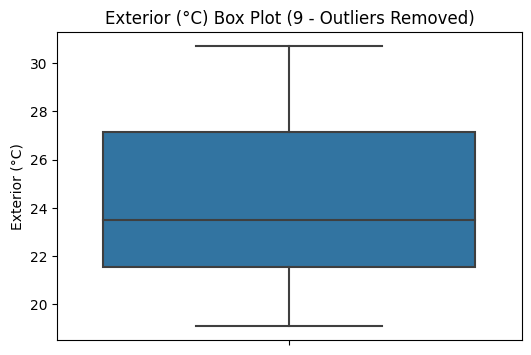

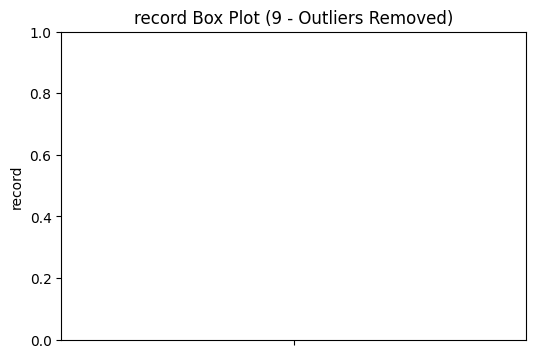

September CO2 Insights: {'record': {'mean': 10134.957142857143, 'std_dev': 5032.573682292378, 'iqr': 6790.0, 'skewness': -0.19769397935717478, 'outliers_removed': 0}}
September Humidity Insights: {'Interior (%)': {'mean': 80.07205882352942, 'std_dev': 6.8169640370956435, 'iqr': 4.2749999999999915, 'skewness': -2.0148215512200007, 'outliers_removed': 8}, 'Exterior (%)': {'mean': 79.44117647058823, 'std_dev': 12.731172640578487, 'iqr': 18.999999999999986, 'skewness': -0.19659658712320952, 'outliers_removed': 0}}
September Temperature Insights: {'Interior (°C)': {'mean': 32.62352941176471, 'std_dev': 2.3323242937169644, 'iqr': 1.8500000000000014, 'skewness': -1.4198696390705894, 'outliers_removed': 8}, 'Exterior (°C)': {'mean': 24.267647058823524, 'std_dev': 3.283629279731139, 'iqr': 5.600000000000001, 'skewness': 0.1653804667541226, 'outliers_removed': 0}}
September Weight Insights: {'record': {'mean': nan, 'std_dev': nan, 'iqr': nan, 'skewness': nan, 'outliers_removed': 0}}


In [18]:
#Perform analysis for September (month=9) on each dataset

co2_insights_september = monthly_analysis(carbondioxide, 9, ['record'])

humidity_insights_september = monthly_analysis(humidity, 9, ['Interior (%)', 'Exterior (%)'])

temperature_insights_september = monthly_analysis(temperatures, 9, ['Interior (°C)', 'Exterior (°C)'])

weight_insights_september = monthly_analysis(weights, 9, ['record'])



# Displaying April insights

print("September CO2 Insights:", co2_insights_september)

print("September Humidity Insights:", humidity_insights_september)

print("September Temperature Insights:", temperature_insights_september)

print("September Weight Insights:", weight_insights_september)


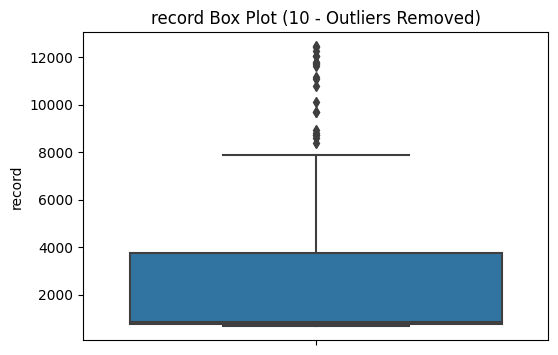

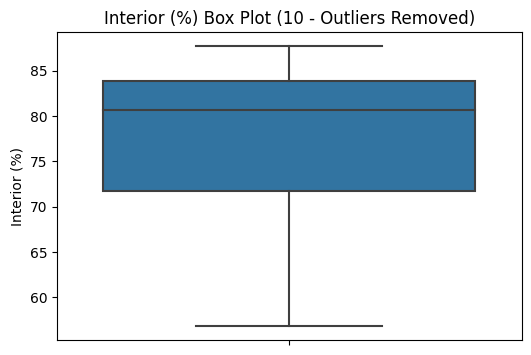

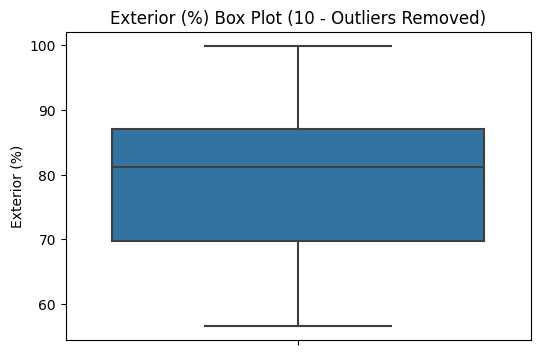

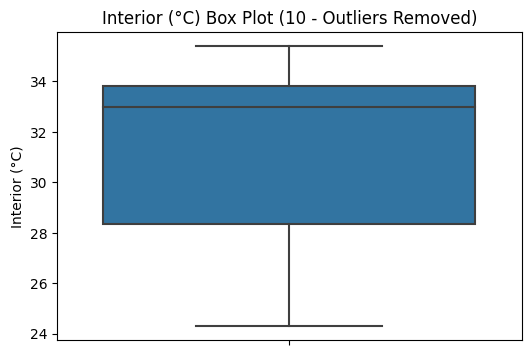

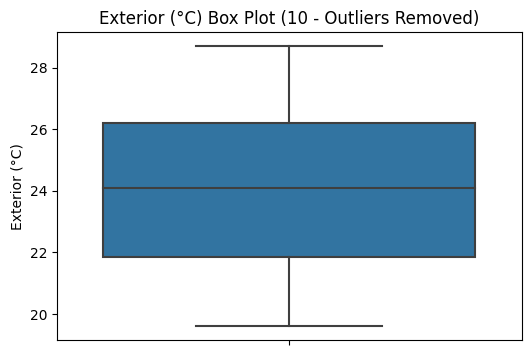

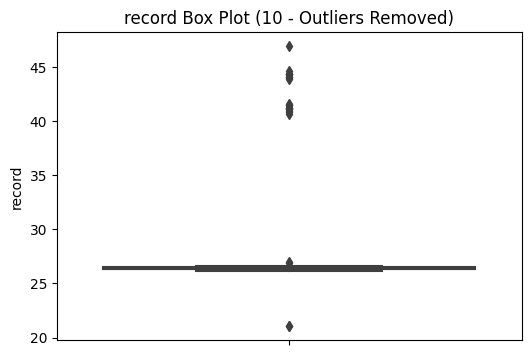

October CO2 Insights: {'record': {'mean': 3901.638376383764, 'std_dev': 5072.488117124933, 'iqr': 4684.0, 'skewness': 1.5233995195340406, 'outliers_removed': 29}}
October Humidity Insights: {'Interior (%)': {'mean': 77.42357723577236, 'std_dev': 8.621723243566676, 'iqr': 12.200000000000017, 'skewness': -0.9050898995645358, 'outliers_removed': 0}, 'Exterior (%)': {'mean': 79.83983739837397, 'std_dev': 11.776941487203548, 'iqr': 17.450000000000017, 'skewness': -0.23962237321088134, 'outliers_removed': 0}}
October Temperature Insights: {'Interior (°C)': {'mean': 31.52682926829268, 'std_dev': 3.3456620597652624, 'iqr': 5.449999999999996, 'skewness': -0.9915966536936607, 'outliers_removed': 0}, 'Exterior (°C)': {'mean': 24.068292682926828, 'std_dev': 2.492819756794312, 'iqr': 4.349999999999998, 'skewness': 0.0755355564902774, 'outliers_removed': 0}}
October Weight Insights: {'record': {'mean': 33.654074074074074, 'std_dev': 23.997944500647215, 'iqr': 14.392499999999998, 'skewness': 4.403416

In [19]:
#Implement the analysis for October (month=10) on each dataset

co2_insights_april = monthly_analysis(carbondioxide, 10, ['record'])

humidity_insights_april = monthly_analysis(humidity, 10, ['Interior (%)', 'Exterior (%)'])

temperature_insights_april = monthly_analysis(temperatures, 10, ['Interior (°C)', 'Exterior (°C)'])

weight_insights_april = monthly_analysis(weights, 10, ['record'])



# Displaying April insights

print("October CO2 Insights:", co2_insights_april)

print("October Humidity Insights:", humidity_insights_april)

print("October Temperature Insights:", temperature_insights_april)

print("October Weight Insights:", weight_insights_april)


In [20]:
# Filtered data for June only

june_data = {

    "carbondioxide": carbondioxide[carbondioxide.index.month == 6],

    "humidity": humidity[humidity.index.month == 6],

    "temperatures": temperatures[temperatures.index.month == 6],

    "weights": weights[weights.index.month == 6]

}


June Internal Temperature Uptime: 141
June Internal Temperature Average: 27.19°C


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


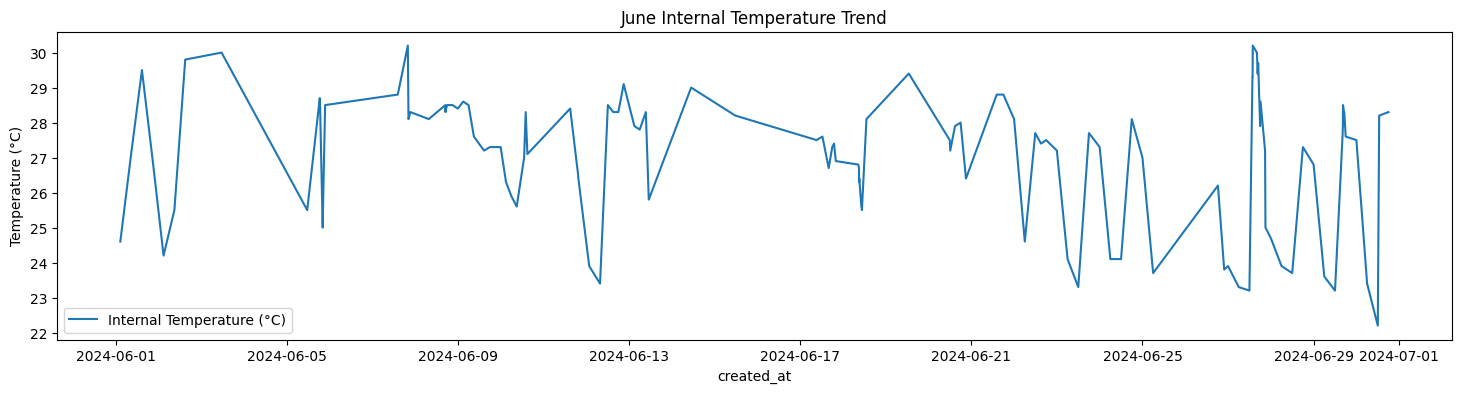

In [21]:
# Internal Temperature Analysis

# 1. Calculate Uptime (number of non-NaN entries)

# 2. Calculate Average Internal Temperature for June

# 3. Plot Internal Temperature for June



internal_temp = june_data["temperatures"]['Interior (°C)']

internal_temp_uptime = internal_temp.count()

internal_temp_avg = internal_temp.mean()



print(f"June Internal Temperature Uptime: {internal_temp_uptime}")

print(f"June Internal Temperature Average: {internal_temp_avg:.2f}°C")



plt.figure(figsize=(18, 4))

sns.lineplot(data=internal_temp, label='Internal Temperature (°C)')

plt.title("June Internal Temperature Trend")

plt.ylabel("Temperature (°C)")

plt.show()


June External Temperature Uptime: 141
June External Temperature Average: 26.37°C


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


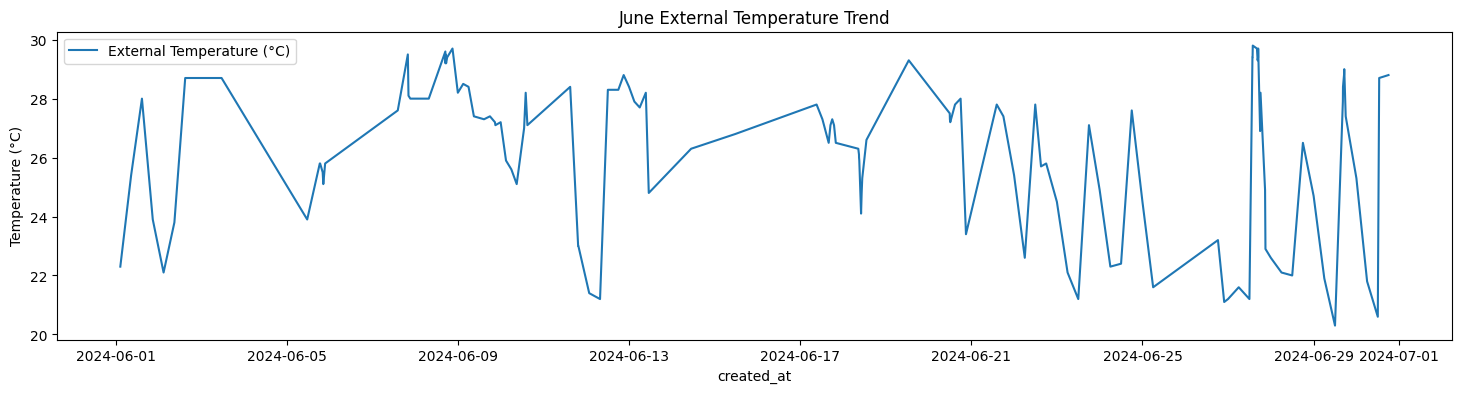

In [22]:
# External Temperature Analysis

# 1. Calculate Uptime (number of non-NaN entries)

# 2. Calculate Average Internal Temperature for June

# 3. Plot Internal Temperature for June



external_temp = june_data["temperatures"]['Exterior (°C)']

external_temp_uptime = external_temp.count()

external_temp_avg = external_temp.mean()



print(f"June External Temperature Uptime: {external_temp_uptime}")

print(f"June External Temperature Average: {external_temp_avg:.2f}°C")



plt.figure(figsize=(18, 4))

sns.lineplot(data=external_temp, label='External Temperature (°C)')

plt.title("June External Temperature Trend")

plt.ylabel("Temperature (°C)")

plt.show()


Correlation between June Internal and External Temperature: 0.92


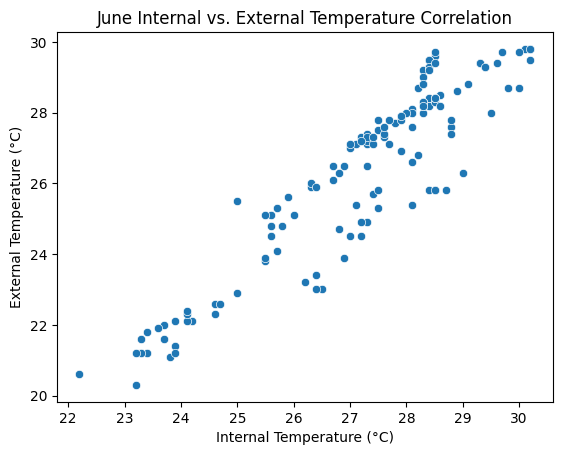

In [23]:
# Analyze correlation between internal and external temperature



temp_corr = internal_temp.corr(external_temp)

print(f"Correlation between June Internal and External Temperature: {temp_corr:.2f}")

sns.scatterplot(x=internal_temp, y=external_temp)

plt.title("June Internal vs. External Temperature Correlation")

plt.xlabel("Internal Temperature (°C)")

plt.ylabel("External Temperature (°C)")

plt.show()


June Internal Humidity Uptime: 141
June Internal Humidity Average: 70.31%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


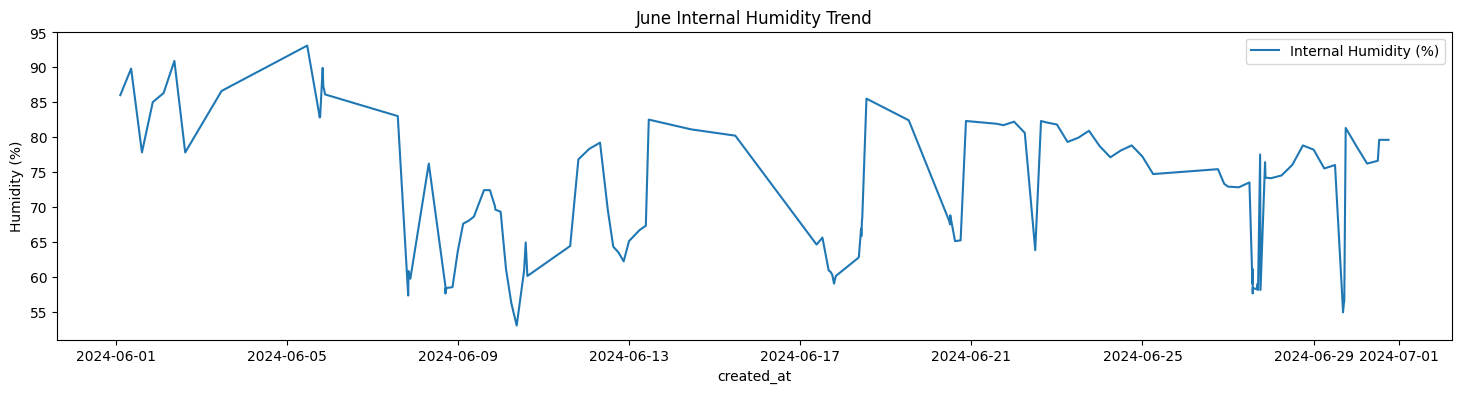

In [24]:
# Uptime, Average, and Plot for Internal Humidity



internal_humidity = june_data["humidity"]['Interior (%)']

internal_humidity_uptime = internal_humidity.count()

internal_humidity_avg = internal_humidity.mean()



print(f"June Internal Humidity Uptime: {internal_humidity_uptime}")

print(f"June Internal Humidity Average: {internal_humidity_avg:.2f}%")



plt.figure(figsize=(18, 4))

sns.lineplot(data=internal_humidity, label='Internal Humidity (%)')

plt.title("June Internal Humidity Trend")

plt.ylabel("Humidity (%)")

plt.show()


June External Humidity Uptime: 141
June External Humidity Average: 67.72%


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


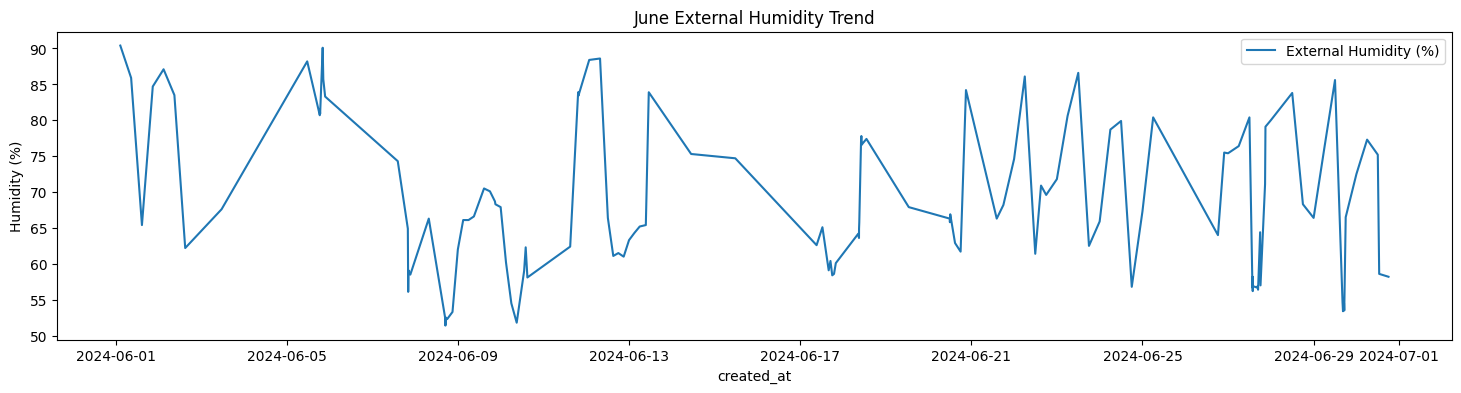

In [25]:
# Uptime, Average, and Plot for External Humidity



external_humidity = june_data["humidity"]['Exterior (%)']

external_humidity_uptime = external_humidity.count()

external_humidity_avg = external_humidity.mean()



print(f"June External Humidity Uptime: {external_humidity_uptime}")

print(f"June External Humidity Average: {external_humidity_avg:.2f}%")



plt.figure(figsize=(18, 4))

sns.lineplot(data=external_humidity, label='External Humidity (%)')

plt.title("June External Humidity Trend")

plt.ylabel("Humidity (%)")

plt.show()


Correlation between June Internal and External Humidity: 0.81


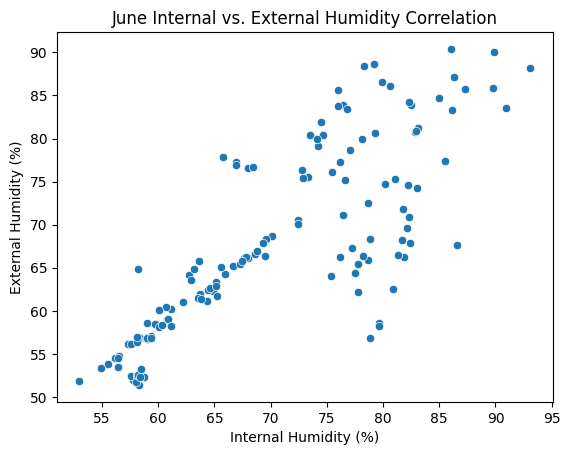

In [26]:
# Correlation between Internal and External Humidity



humidity_corr = internal_humidity.corr(external_humidity)

print(f"Correlation between June Internal and External Humidity: {humidity_corr:.2f}")

sns.scatterplot(x=internal_humidity, y=external_humidity)

plt.title("June Internal vs. External Humidity Correlation")

plt.xlabel("Internal Humidity (%)")

plt.ylabel("External Humidity (%)")

plt.show()


June Carbon Dioxide Uptime: 159
June Carbon Dioxide Average: 1183.24


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


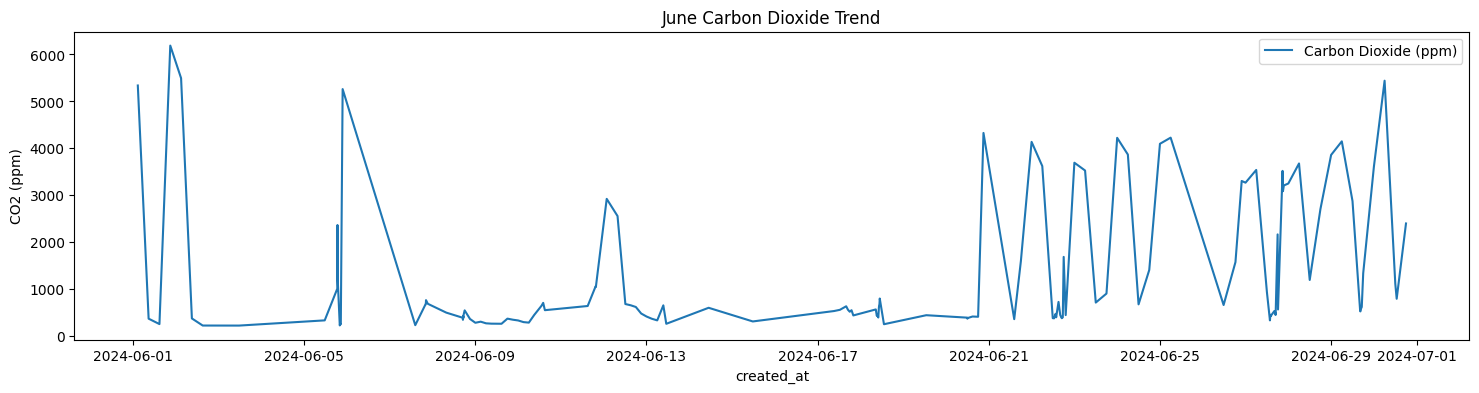

In [27]:
# Calculate Uptime and Average CO2 levels, and plot



co2 = june_data["carbondioxide"]['record']

co2_uptime = co2.count()

co2_avg = co2.mean()



print(f"June Carbon Dioxide Uptime: {co2_uptime}")

print(f"June Carbon Dioxide Average: {co2_avg:.2f}")



plt.figure(figsize=(18, 4))

sns.lineplot(data=co2, label='Carbon Dioxide (ppm)')

plt.title("June Carbon Dioxide Trend")

plt.ylabel("CO2 (ppm)")

plt.show()


Correlation between June Carbon Dioxide and Internal Temperature: -0.48


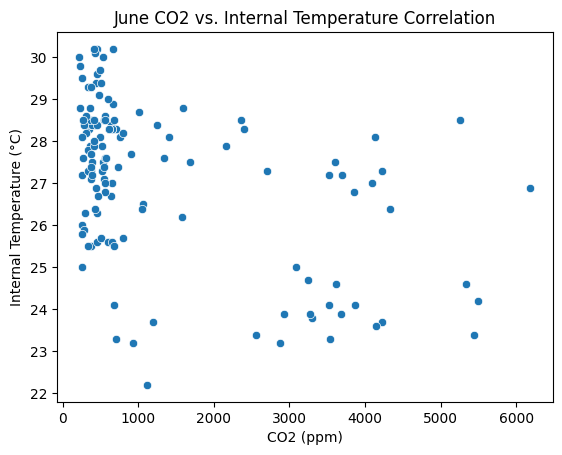

In [28]:
# Correlation between Carbon Dioxide and Internal Temperature



co2_temp_corr = co2.corr(internal_temp)

print(f"Correlation between June Carbon Dioxide and Internal Temperature: {co2_temp_corr:.2f}")

sns.scatterplot(x=co2, y=internal_temp)

plt.title("June CO2 vs. Internal Temperature Correlation")

plt.xlabel("CO2 (ppm)")

plt.ylabel("Internal Temperature (°C)")

plt.show()


June Weight Uptime: 93
June Weight Average: 22.70
June Daily Weight Fluctuations (first 5 days):
created_at
2024-06-01 08:44:48   -0.07
2024-06-01 14:48:49    0.00
2024-06-01 20:53:11    0.06
2024-06-02 02:56:55    0.04
2024-06-02 09:00:54   -0.02
Name: record, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


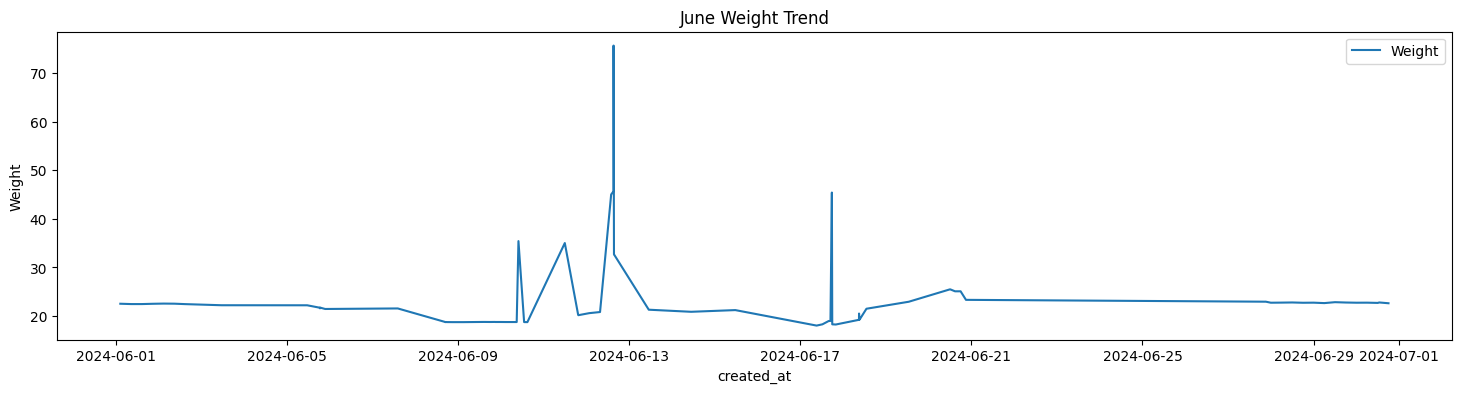

In [29]:
# Calculate Uptime, Daily Fluctuations, Average, and plot



weight = june_data["weights"]['record']

weight_uptime = weight.count()

weight_avg = weight.mean()

weight_daily_fluctuations = weight.diff().dropna()



print(f"June Weight Uptime: {weight_uptime}")

print(f"June Weight Average: {weight_avg:.2f}")

print("June Daily Weight Fluctuations (first 5 days):")

print(weight_daily_fluctuations.head())



plt.figure(figsize=(18, 4))

sns.lineplot(data=weight, label='Weight')

plt.title("June Weight Trend")

plt.ylabel("Weight")

plt.show()


Correlation between June Weight and Internal Temperature: -0.22


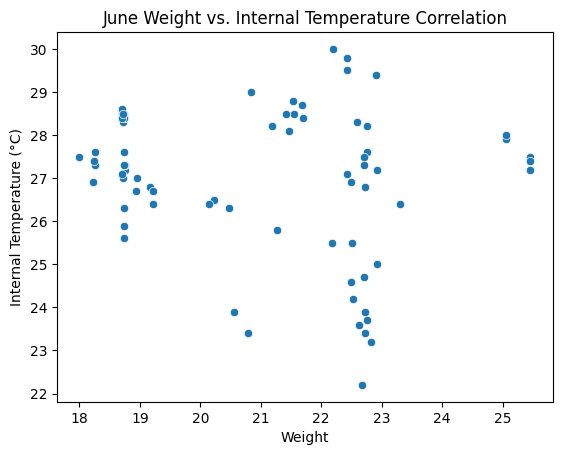

In [30]:
# Correlation between Weight and Internal Temperature



weight_temp_corr = weight.corr(internal_temp)

print(f"Correlation between June Weight and Internal Temperature: {weight_temp_corr:.2f}")

sns.scatterplot(x=weight, y=internal_temp)

plt.title("June Weight vs. Internal Temperature Correlation")

plt.xlabel("Weight")

plt.ylabel("Internal Temperature (°C)")

plt.show()


Correlation between June Weight and Carbon Dioxide: 0.44


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

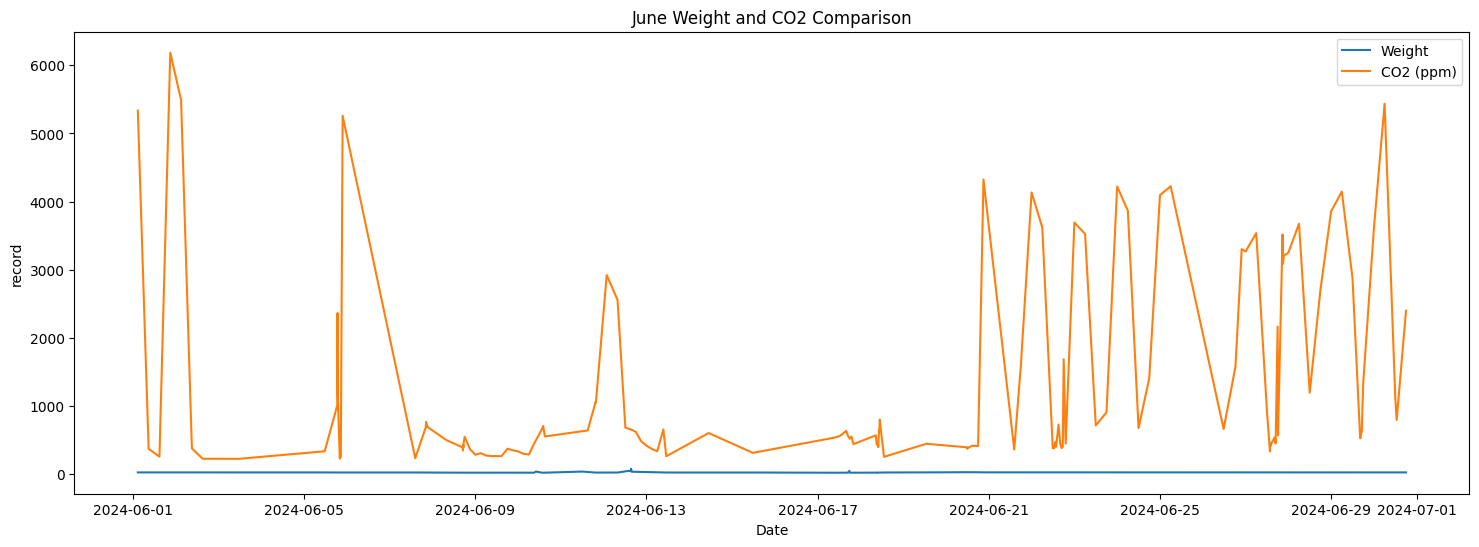

In [31]:
# Correlation between Weight and Carbon Dioxide

weight_co2_corr = weight.corr(co2)

print(f"Correlation between June Weight and Carbon Dioxide: {weight_co2_corr:.2f}")



# Plot weight and CO2 levels to observe any trends over time



plt.figure(figsize=(18, 6))

sns.lineplot(data=weight, label="Weight")

sns.lineplot(data=co2, label="CO2 (ppm)")

plt.title("June Weight and CO2 Comparison")

plt.xlabel("Date")

plt.legend()

plt.show()
